In [1]:
# Biblioteca
import numpy as np
import polars as pl

df = pl.read_csv('data_NN_auger.csv')
df = df.sample(fraction= 1.0, shuffle=True)

In [2]:
df

simulation_id,composition,energy,id,particles
i64,str,f64,f64,f64
25,"""nitrogen""",3.1600e19,825.0,3.496974
72,"""nitrogen""",1.0000e19,838.0,455765.802403
15,"""proton""",1.0000e19,820.0,0.0
75,"""carbon""",1.0000e18,837.0,0.0
130,"""proton""",1.0000e18,809.0,0.0
…,…,…,…,…
179,"""oxygen""",1.0000e18,1436.0,0.0
48,"""proton""",1.0000e19,1444.0,0.0
433,"""iron""",1.0000e18,1443.0,0.0


In [3]:
df_neural = df.pivot(
    values=["particles"],
    index=["energy", "composition", "simulation_id"],
    on="id",
    aggregate_function= None
)

df_neural = df_neural.with_columns(
      ((pl.col('energy').log10()))
    )

list1 = df_neural.columns
del list1[0:3]

for col in list1:
    df_neural = df_neural.with_columns(pl.col(col).log1p().alias(f"log_{col}"))

log_particle_columns = [f"log_{col}" for col in list1]


df_neural = df_neural.with_columns(
    pl.concat_list(log_particle_columns).list.mean().alias("mean_particles")
)

df_neural = df_neural.with_columns([
    pl.concat_list(log_particle_columns).list.std().alias("std_particles"),
    pl.concat_list(log_particle_columns).list.max().alias("max_particles")]
)

df_neural = df_neural.drop(list1)

df_neural

energy,composition,simulation_id,log_825.0,log_838.0,log_820.0,log_837.0,log_809.0,log_813.0,log_1444.0,log_1821.0,log_1445.0,log_818.0,log_805.0,log_1233.0,log_1235.0,log_810.0,log_1446.0,log_1232.0,log_1871.0,log_511.0,log_814.0,log_1209.0,log_1447.0,log_1526.0,log_510.0,log_811.0,log_1425.0,log_1828.0,log_1436.0,log_509.0,log_831.0,log_1013.0,log_829.0,log_1443.0,log_503.0,log_835.0,log_523.0,log_506.0,log_1717.0,log_1215.0,log_1437.0,log_826.0,log_1234.0,log_1421.0,log_1429.0,log_1432.0,mean_particles,std_particles,max_particles
f64,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
19.499687,"""nitrogen""",25,1.503405,18.646352,0.0,0.0,1.805983,0.0,1.49434,0.911792,3.257243,0.0,3.634796,3.539473,1.528485,0.0,0.0,0.0,3.878637,0.0,0.911792,0.0,3.386656,0.0,0.0,1.375841,0.0,0.0,1.847729,0.0,0.0,0.0,0.0,0.0,0.0,0.846092,0.0,0.0,0.0,0.0,0.0,3.263357,0.0,0.0,0.846092,0.0,1.197229,2.959507,18.646352
19.0,"""nitrogen""",72,0.0,13.029737,0.0,1.427064,1.031706,0.0,0.896989,1.522208,2.028504,0.0,2.547123,2.504567,0.759244,0.0,0.0,0.0,2.382488,0.0,1.522208,0.0,2.489771,0.0,0.0,0.700298,0.0,0.0,1.04365,0.0,0.0,0.0,0.918618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.092161,0.0,0.0,0.0,0.0,0.838553,2.06579,13.029737
19.0,"""proton""",15,0.0,16.517876,0.0,0.0,0.0,0.0,0.801231,0.0,1.946797,0.0,1.640002,2.42722,1.258279,0.0,0.0,0.0,1.864308,0.0,0.0,0.0,2.653298,0.0,0.0,1.051952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.767535,0.0,0.0,0.0,0.0,0.0,1.825239,0.0,0.0,0.767535,0.0,0.761847,2.542798,16.517876
18.0,"""carbon""",75,0.0,14.273701,0.0,0.0,0.902374,0.0,0.0,0.0,0.0,0.0,1.306573,1.024561,0.0,0.0,0.0,0.0,1.020438,0.0,0.0,0.0,0.990698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.717266,0.0,0.0,0.0,0.0,0.4599,2.159568,14.273701
18.0,"""proton""",130,0.0,14.802071,0.0,0.0,0.0,0.0,0.0,0.0,0.766494,0.0,0.970013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.753787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.748857,0.0,0.0,0.0,0.0,0.432755,2.241398,14.802071
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
18.0,"""iron""",204,0.0,9.385452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.997541,0.0,0.0,0.0,0.0,0.0,1.348531,0.0,0.0,0.0,0.979281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288882,1.432086,9.385452
18.0,"""proton""",438,0.0,12.433804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.226416,0.0,0.0,0.0,0.0,1.074004,0.0,0.0,0.0,1.219563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.362586,1.886055,12.433804
18.0,"""oxygen""",338,0.0,15.913275,0.0,0.0,0.0,0.0,0.0,0.0,1.818376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.153092,0.0,0.0,0.0,0.735992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.445926,2.409577,15.913275


In [4]:
# Bibliotecas
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from numpy import unique

# Definições do x e do y
remove = ['energy', 'composition', 'simulation_id']

y_energy = df_neural.select('energy').to_numpy()
y_composition = df_neural.select('composition').to_numpy().reshape(-1)

y_combined = y_composition.copy()
classes_to_group = ['carbon', 'nitrogen', 'oxygen']
new_class_name = 'CNO'
for i, comp in enumerate(y_combined):
    if comp in classes_to_group:
        y_combined[i] = new_class_name

le = LabelEncoder()
y_composition = le.fit_transform(y_combined)
num_classes = len(unique(y_composition))

# Normalização
scaler_x = StandardScaler()
x = df_neural.select(pl.exclude(remove)).to_numpy()
x_scaled = scaler_x.fit_transform(x)

scaler_y_energy = StandardScaler()
y_energy_scaled = scaler_y_energy.fit_transform(y_energy)

x_train, x_test, y_energy_train, y_energy_test, y_comp_train, y_comp_test = train_test_split(
    x_scaled, 
    y_energy_scaled, 
    y_composition, 
    test_size=0.2
)

# Conversão para tensores do pytorch
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

y_energy_train_tensor = torch.tensor(y_energy_train, dtype=torch.float32).squeeze(1)
y_energy_test_tensor = torch.tensor(y_energy_test, dtype=torch.float32).squeeze(1)

y_comp_train_tensor = torch.tensor(y_comp_train, dtype=torch.long)
y_comp_test_tensor = torch.tensor(y_comp_test, dtype=torch.long)

In [5]:
class MultiTaskModel(nn.Module):
    def __init__(self, input_size, num_classes, dropout_prob=0.3):
        super().__init__()
        
        self.shared_layers = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.1),
            nn.Dropout(dropout_prob),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.1),
            nn.Dropout(dropout_prob),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.1)
        )

        # Cabeça de regressão
        self.energy_head = nn.Linear(128, 1)

        # Cabeça de classificação
        self.composition_head = nn.Sequential(
        nn.Dropout(0.6),  
        nn.Linear(128, 256),
        nn.BatchNorm1d(256),
        nn.GELU(),
        nn.Dropout(0.5),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.GELU(),
        nn.Linear(128, num_classes)
        )
              
    def forward(self, x):
        shared = self.shared_layers(x)
        energy = self.energy_head(shared)
        composition = self.composition_head(shared)
        return energy, composition

In [6]:
class ParticleDataset(Dataset):
    def __init__(self, x, y_energy, y_comp):
        self.x = x
        self.y_energy = y_energy
        self.y_comp = y_comp
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], (self.y_energy[idx], self.y_comp[idx])

#train_dataset = ParticleDataset(x_train_tensor, y_energy_train_tensor, y_comp_train_tensor, y_theta_train_tensor, y_phi_train_tensor)
#test_dataset = ParticleDataset(x_test_tensor, y_energy_test_tensor, y_comp_test_tensor, y_theta_test_tensor, y_phi_test_tensor)

train_dataset = ParticleDataset(x_train_tensor, y_energy_train_tensor, y_comp_train_tensor)
test_dataset = ParticleDataset(x_test_tensor, y_energy_test_tensor, y_comp_test_tensor)

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [7]:
# Configuração do treino
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MultiTaskModel(input_size=x_train.shape[1], num_classes=num_classes).to(device)

from sklearn.utils.class_weight import compute_class_weight

# Calcular os pesos para cada classe
class_weights = compute_class_weight(
    'balanced', 
    classes=np.unique(y_comp_train),  
    y=y_comp_train                   
)

# Converter para tensor e enviar para o dispositivo (GPU/CPU)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

print("Pesos das classes:", class_weights)
print("Classes:", le.classes_)

criterion_energy = nn.MSELoss()
criterion_composition = nn.CrossEntropyLoss()#weight=class_weights)
criterion_angle = nn.MSELoss()

class FocalLoss(nn.Module):
    def __init__(self, alpha=class_weights, gamma=2.0):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', weight=self.alpha)
        pt = torch.exp(-ce_loss)
        return torch.mean(self.alpha[targets] * (1-pt)**self.gamma * ce_loss)

criterion_composition = FocalLoss()

optimizer = optim.AdamW(model.parameters(), lr=0.0003, weight_decay=1e-4)


from torch.optim.lr_scheduler import CosineAnnealingLR

scheduler = CosineAnnealingLR(optimizer, T_max=100)

Pesos das classes: tensor([0.4511, 1.2848, 2.8874, 1.5188], device='cuda:0')
Classes: ['CNO' 'iron' 'photon' 'proton']


In [8]:
def train_model(model, train_loader, test_loader, optimizer, device, epochs=100):
    train_history = {
        'loss': [], 'energy_loss': [], 'comp_loss': [],
        'energy_r2': [], 'energy_rmse': [], 
        'comp_accuracy': []
    }
    test_history = {
        'loss': [], 'energy_loss': [], 'comp_loss': [], 
        'energy_r2': [], 'energy_rmse': [], 
        'comp_accuracy': []
    }
    
    # Variáveis para armazenar previsões e rótulos para matriz de confusão
    all_comp_preds = []
    all_comp_true = []
    
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        epoch_energy_loss = 0
        epoch_comp_loss = 0
        
        # Arrays para armazenar todas as previsões e valores reais
        all_energy_pred = []
        all_energy_true = []
        all_comp_pred = []
        all_comp_true = []
        
        for inputs, (energy, comp) in train_loader:
            inputs = inputs.to(device)
            energy = energy.to(device)
            comp = comp.to(device)
            
            optimizer.zero_grad()
            energy_pred, comp_pred = model(inputs)
            
            # Calcular perdas
            #loss_energy = criterion_energy(energy_pred.squeeze(), energy)
            energy_pred_flat = energy_pred.view(-1)  
            energy_flat = energy.view(-1)
            loss_energy = criterion_energy(energy_pred_flat, energy_flat)
            loss_comp = criterion_composition(comp_pred, comp)
            
            # Balanceamento de tarefas
            total_loss = 0.4 * loss_energy + 0.6 * loss_comp 
            
            total_loss.backward()
            optimizer.step()
            
            # Acumular perdas
            epoch_loss += total_loss.item()
            epoch_energy_loss += loss_energy.item()
            epoch_comp_loss += loss_comp.item()
            
            # Coletar dados para métricas
            all_energy_pred.append(energy_pred.detach().cpu().numpy())
            all_energy_true.append(energy.detach().cpu().numpy())
            all_comp_pred.append(comp_pred.argmax(dim=1).detach().cpu().numpy())
            all_comp_true.append(comp.detach().cpu().numpy())
        
        # Concatenar todos os batches
        all_energy_pred = np.concatenate(all_energy_pred)
        all_energy_true = np.concatenate(all_energy_true)
        all_comp_pred = np.concatenate(all_comp_pred)
        all_comp_true = np.concatenate(all_comp_true)
        
        # Calcular métricas de treino
        train_energy_r2 = r2_score(all_energy_true, all_energy_pred)
        train_energy_rmse = np.sqrt(mean_squared_error(all_energy_true, all_energy_pred))
        train_comp_accuracy = accuracy_score(all_comp_true, all_comp_pred)
        
        # Salvar histórico de treino
        train_history['loss'].append(epoch_loss / len(train_loader))
        train_history['energy_loss'].append(epoch_energy_loss / len(train_loader))
        train_history['comp_loss'].append(epoch_comp_loss / len(train_loader))
        train_history['energy_r2'].append(train_energy_r2)
        train_history['energy_rmse'].append(train_energy_rmse)
        train_history['comp_accuracy'].append(train_comp_accuracy)
        
        # Avaliação no teste
        model.eval()
        test_loss = 0
        test_energy_loss = 0
        test_comp_loss = 0
        
        # Arrays para armazenar todas as previsões e valores reais (teste)
        test_all_energy_pred = []
        test_all_energy_true = []
        test_all_comp_pred = []
        test_all_comp_true = []
        
        with torch.no_grad():
            for inputs, (energy, comp) in test_loader:
                inputs = inputs.to(device)
                energy = energy.to(device)
                comp = comp.to(device)
                
                energy_pred, comp_pred = model(inputs)
                
                # Calcular perdas
                #loss_energy = criterion_energy(energy_pred.squeeze(), energy)
                energy_pred_flat = energy_pred.view(-1)  
                energy_flat = energy.view(-1)
                loss_energy = criterion_energy(energy_pred_flat, energy_flat)
                loss_comp = criterion_composition(comp_pred, comp)
                total_loss = 0.4 * loss_energy + 0.6 * loss_comp 
                
                # Acumular perdas
                test_loss += total_loss.item()
                test_energy_loss += loss_energy.item()
                test_comp_loss += loss_comp.item()
                
                # Coletar dados para métricas
                test_all_energy_pred.append(energy_pred.detach().cpu().numpy())
                test_all_energy_true.append(energy.detach().cpu().numpy())

                # Coletar previsões para matriz de confusão
                comp_pred_labels = comp_pred.argmax(dim=1).detach().cpu().numpy()
                test_all_comp_pred.append(comp_pred_labels)
                test_all_comp_true.append(comp.detach().cpu().numpy())
        
        # Concatenar todos os batches
        test_all_energy_pred = np.concatenate(test_all_energy_pred)
        test_all_energy_true = np.concatenate(test_all_energy_true)
        test_all_comp_pred = np.concatenate(test_all_comp_pred)
        test_all_comp_true = np.concatenate(test_all_comp_true)
        
        # Armazenar previsões para matriz de confusão (última época)
        if epoch == epochs - 1:
            all_comp_preds = test_all_comp_pred
            all_comp_true = test_all_comp_true
        
        
        # Calcular métricas de teste
        test_energy_r2 = r2_score(test_all_energy_true, test_all_energy_pred)
        test_energy_rmse = np.sqrt(mean_squared_error(test_all_energy_true, test_all_energy_pred))
        test_comp_accuracy = accuracy_score(test_all_comp_true, test_all_comp_pred)
        
        # Salvar histórico de teste
        test_history['loss'].append(test_loss / len(test_loader))
        test_history['energy_loss'].append(test_energy_loss / len(test_loader))
        test_history['comp_loss'].append(test_comp_loss / len(test_loader))
        test_history['energy_r2'].append(test_energy_r2)
        test_history['energy_rmse'].append(test_energy_rmse)
        test_history['comp_accuracy'].append(test_comp_accuracy)
        
        print(f'Epoch {epoch+1}/{epochs}')
        print(f'Train Loss: {train_history["loss"][-1]:.4f} | Test Loss: {test_history["loss"][-1]:.4f}')
        print(f'Energy - Train R²: {train_energy_r2:.4f}, RMSE: {train_energy_rmse:.4f} | Test R²: {test_energy_r2:.4f}, RMSE: {test_energy_rmse:.4f}')
        print(f'Comp   - Train Acc: {train_comp_accuracy:.4f} | Test Acc: {test_comp_accuracy:.4f}')
        print('-' * 80)
        
        torch.save(model.state_dict(), 'model_weights_auger.pth')
    
    return train_history, test_history, all_comp_preds, all_comp_true

In [9]:
train_history, test_history, comp_preds, comp_true = train_model(
    model, train_loader, test_loader, optimizer, device, epochs=100
)

Epoch 1/100
Train Loss: 1.1833 | Test Loss: 1.0251
Energy - Train R²: 0.5496, RMSE: 0.6756 | Test R²: 0.7642, RMSE: 0.4718
Comp   - Train Acc: 0.1675 | Test Acc: 0.0951
--------------------------------------------------------------------------------
Epoch 2/100
Train Loss: 0.9805 | Test Loss: 0.8608
Energy - Train R²: 0.8078, RMSE: 0.4413 | Test R²: 0.8007, RMSE: 0.4337
Comp   - Train Acc: 0.1356 | Test Acc: 0.1198
--------------------------------------------------------------------------------
Epoch 3/100
Train Loss: 0.8835 | Test Loss: 0.7500
Energy - Train R²: 0.8273, RMSE: 0.4184 | Test R²: 0.8825, RMSE: 0.3330
Comp   - Train Acc: 0.1446 | Test Acc: 0.1426
--------------------------------------------------------------------------------
Epoch 4/100
Train Loss: 0.8159 | Test Loss: 0.7006
Energy - Train R²: 0.8484, RMSE: 0.3920 | Test R²: 0.8884, RMSE: 0.3246
Comp   - Train Acc: 0.1470 | Test Acc: 0.1635
--------------------------------------------------------------------------------


In [10]:
def set_dropout_train(model):
    """Set all dropout layers to training mode and store original states."""
    dropout_states = []
    for m in model.modules():
        if isinstance(m, nn.Dropout):
            dropout_states.append(m.training)
            m.train()
    return dropout_states

def restore_dropout(model, dropout_states):
    """Restore dropout layers to their original states."""
    idx = 0
    for m in model.modules():
        if isinstance(m, nn.Dropout):
            m.train(dropout_states[idx])
            idx += 1

def mc_dropout_predict(model, loader, device, num_samples=30):
    """Perform MC Dropout sampling for uncertainty estimation."""
    model.eval()
    dropout_states = set_dropout_train(model)
    
    # Containers for results
    results = {
        'energy_mean': [], 'energy_std': [],
        'comp_probs': [], 'entropy': [],
        'energy_true': [], 'comp_true': []
    }
    
    with torch.no_grad():
        for inputs, (energy, comp) in loader:
            inputs = inputs.to(device)
            energy = energy.to(device)
            comp = comp.to(device)
            
            # MC sampling containers for current batch
            energy_samples = []
            comp_samples = []
            
            for _ in range(num_samples):
                e_out, c_out = model(inputs)
                energy_samples.append(e_out.squeeze().cpu().numpy())
                comp_samples.append(c_out.cpu().numpy())
            
            # Convert to arrays for vectorized operations
            energy_samples = np.array(energy_samples)
            comp_samples = np.array(comp_samples)
            
            # Energy predictions
            results['energy_mean'].append(energy_samples.mean(axis=0))
            results['energy_std'].append(energy_samples.std(axis=0))
            results['energy_true'].append(energy.cpu().numpy())
                       
            # Composition predictions
            comp_probs = F.softmax(
                torch.tensor(comp_samples).mean(dim=0), 
                dim=-1
            ).numpy()
            entropy = -np.sum(comp_probs * np.log(comp_probs + 1e-9), axis=1)
            
            results['comp_probs'].append(comp_probs)
            results['entropy'].append(entropy)
            results['comp_true'].append(comp.cpu().numpy())
    
    # Concatenate all batch results
    for key in results:
        if key != 'comp_probs':  # Already list of arrays
            results[key] = np.concatenate(results[key])
        else:
            results[key] = np.vstack(results[key])
    
    restore_dropout(model, dropout_states)
    return results

In [11]:
mc_results = mc_dropout_predict(
    model, 
    test_loader, 
    device, 
    num_samples=100 
)

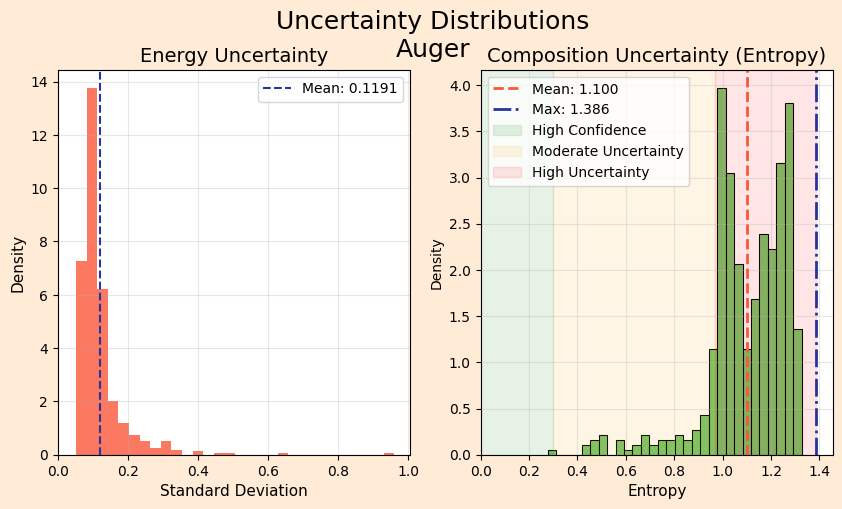

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações
BACKGROUND = '#FFEBD6'  # Cor de fundo da figura
COLOR1 = '#F95738'      # Laranja principal
COLOR2 = '#29339B'      # Azul para linhas de referência
COLOR3 = '#54B847'      # Verde para entropia

# Calcular estatísticas importantes
energy_mean = np.mean(mc_results['energy_std'])
entropy_mean = np.mean(mc_results['entropy'])
num_classes = mc_results['comp_probs'].shape[1]  # Número de classes de composição
max_entropy = np.log(num_classes)        # Máximo teórico de entropia

# Criar figura com fundo bege
fig, axes = plt.subplots(1, 2, figsize=(10, 5), facecolor=BACKGROUND)
axes = axes.flatten()

# Gráfico de incerteza de energia
ax0 = axes[0]
ax0.hist(mc_results['energy_std'], bins=30, color=COLOR1, density=True, alpha=0.8)
ax0.set_title('Energy Uncertainty', size=14)
ax0.set_xlabel('Standard Deviation', fontsize=11)
ax0.set_ylabel('Density', fontsize=11)
ax0.axvline(energy_mean, color=COLOR2, linestyle='--', 
            label=f'Mean: {energy_mean:.4f}')
ax0.legend(fontsize=10)
ax0.set_facecolor('white')  # Fundo branco para o gráfico
ax0.grid(True, alpha=0.3)

# Gráfico de entropia de composição (versão aprimorada)
ax1 = axes[1]
sns.histplot(mc_results['entropy'], bins=30, kde=False, stat='density',
             color=COLOR3, ax=ax1, alpha=0.8)
ax1.set_title('Composition Uncertainty (Entropy)', size=14)
ax1.set_xlabel('Entropy', fontsize=11)
ax1.set_facecolor('white')  # Fundo branco para o gráfico

# Adicionar linhas de referência e regiões
ax1.axvline(entropy_mean, color=COLOR1, linestyle='--', linewidth=2,
            label=f'Mean: {entropy_mean:.3f}')
ax1.axvline(max_entropy, color=COLOR2, linestyle='-.', linewidth=2,
            label=f'Max: {max_entropy:.3f}')

# Regiões de incerteza
ax1.axvspan(0, 0.3, alpha=0.1, color='green', label='High Confidence')
ax1.axvspan(0.3, max_entropy*0.7, alpha=0.1, color='orange', label='Moderate Uncertainty')
ax1.axvspan(max_entropy*0.7, max_entropy, alpha=0.1, color='red', label='High Uncertainty')

ax1.legend(fontsize=10, loc='upper left')
ax1.grid(True, alpha=0.3)

# Ajustar legendas para fundo branco
for ax in axes:
    if ax.get_legend() is not None:
        legend = ax.get_legend()
        legend.get_frame().set_facecolor('white')
        legend.get_frame().set_alpha(0.8)
    
    # Garantir que os eixos comecem no zero
    ax.set_xlim(left=0)

# Título principal
fig.suptitle('Uncertainty Distributions\nAuger', size=18)

# Layout e salvamento
plt.savefig('mc_dropout_auger.pdf', bbox_inches='tight', dpi=600, facecolor=BACKGROUND)
plt.show()

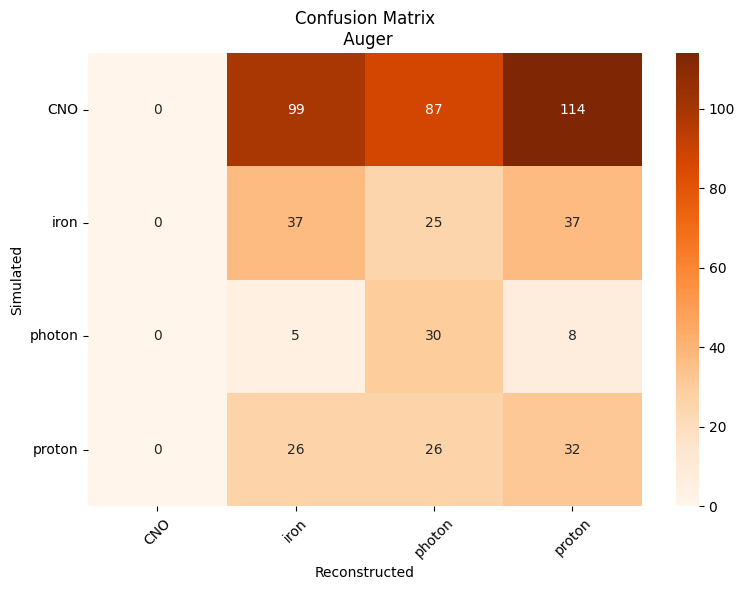


Relatório de Classificação:
              precision    recall  f1-score   support

         CNO       0.00      0.00      0.00       300
        iron       0.22      0.37      0.28        99
      photon       0.18      0.70      0.28        43
      proton       0.17      0.38      0.23        84

    accuracy                           0.19       526
   macro avg       0.14      0.36      0.20       526
weighted avg       0.08      0.19      0.11       526


Acurácia por Classe:
CNO: 0.0000 (300 amostras)
iron: 0.3737 (99 amostras)
photon: 0.6977 (43 amostras)
proton: 0.3810 (84 amostras)


C:\Users\Lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [14]:
import seaborn as sns
from sklearn.metrics import classification_report
cm = confusion_matrix(comp_true, comp_preds)

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.title('Confusion Matrix\n Auger')
plt.xlabel('Reconstructed')
plt.ylabel('Simulated')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('matrix1_auger.pdf', bbox_inches='tight', dpi=600)
plt.show()

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(
    comp_true, 
    comp_preds, 
    target_names=le.classes_
))

class_accuracy = {}
for i, class_name in enumerate(le.classes_):
    class_idx = np.where(le.transform([class_name])[0] == comp_true)[0]
    correct = np.sum(comp_preds[class_idx] == comp_true[class_idx])
    total = len(class_idx)
    class_accuracy[class_name] = (correct / total, total)

print("\nAcurácia por Classe:")
for class_name, (acc, count) in class_accuracy.items():
    print(f"{class_name}: {acc:.4f} ({count} amostras)")

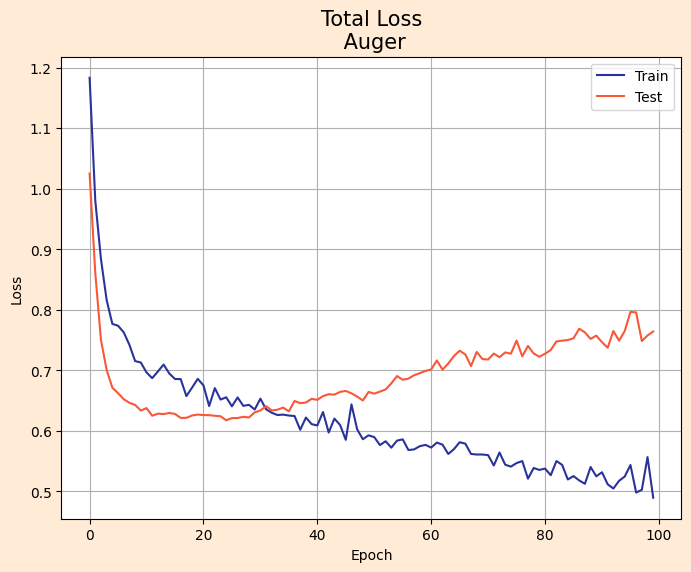

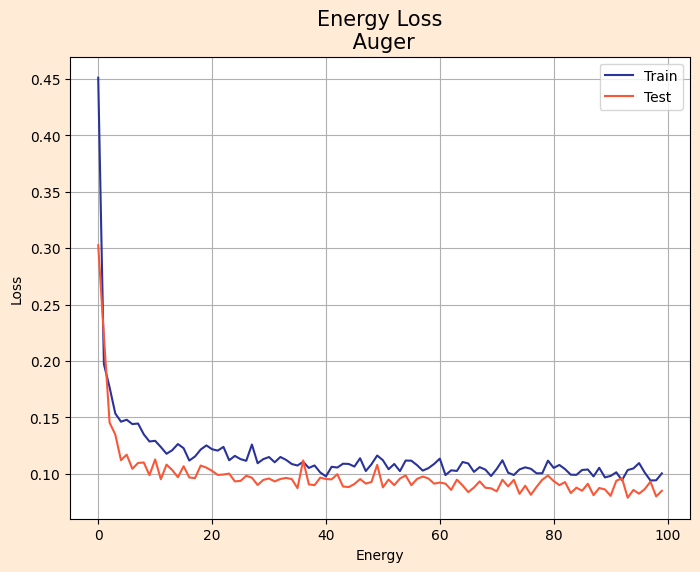

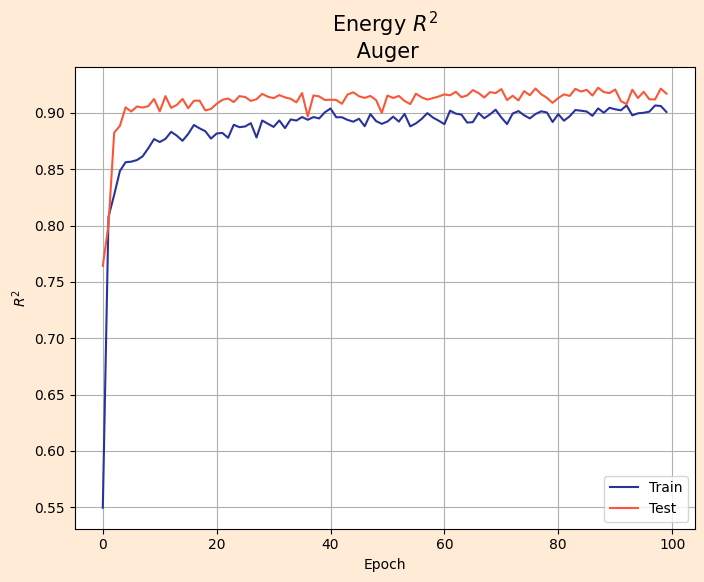

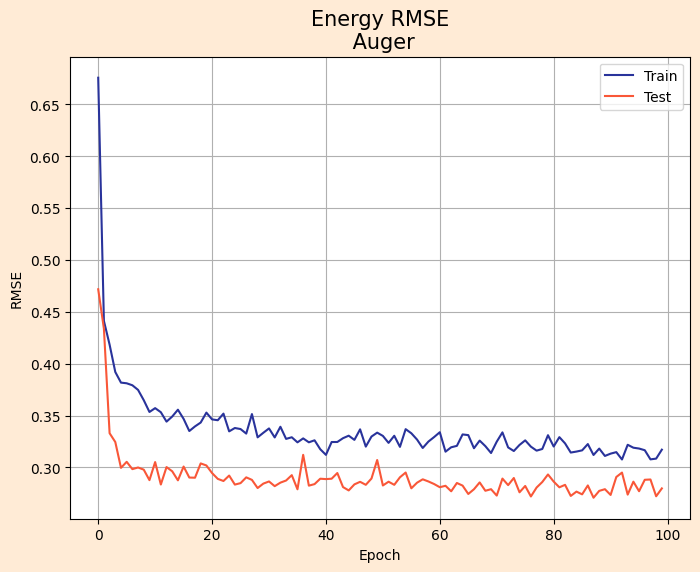

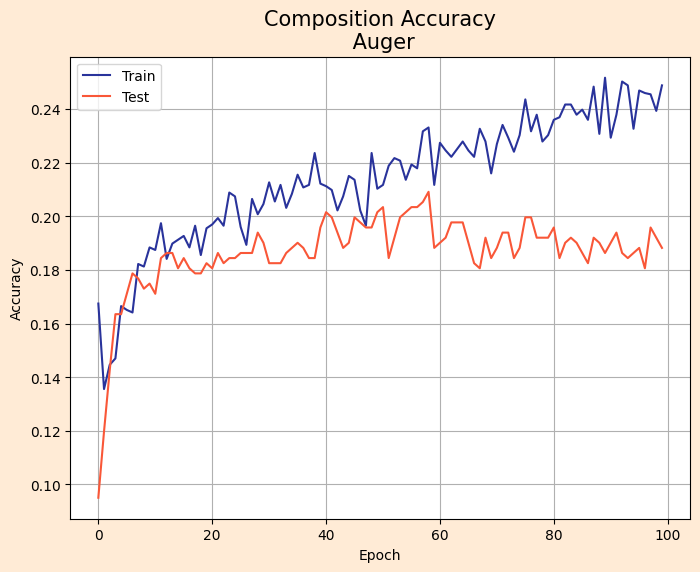

In [15]:
fig, ax = plt.subplots(figsize=(8, 6), facecolor='#FFEBD6')

ax.plot(train_history['loss'], label='Train', color='#29339B') 
ax.plot(test_history['loss'], label='Test', color='#F95738')  

ax.set_title('Total Loss\n Auger', size=15)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True)

ax.set_facecolor('white')

plt.savefig('loss_plot_auger.pdf', 
            bbox_inches='tight', 
            dpi=600)

fig, ax = plt.subplots(figsize=(8, 6), facecolor='#FFEBD6')

ax.plot(train_history['energy_loss'], label='Train', color='#29339B') 
ax.plot(test_history['energy_loss'], label='Test', color='#F95738')  

ax.set_title('Energy Loss\n Auger', size=15)
ax.set_xlabel('Energy')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True)

ax.set_facecolor('white')

plt.savefig('energy_plot_auger.pdf', 
            bbox_inches='tight', 
            dpi=600)


fig, ax = plt.subplots(figsize=(8, 6), facecolor='#FFEBD6')

ax.plot(train_history['energy_r2'], label='Train', color='#29339B') 
ax.plot(test_history['energy_r2'], label='Test', color='#F95738')  

ax.set_title('Energy '+ f'$R^2$' + '\n Auger', size=15)
ax.set_xlabel('Epoch')
ax.set_ylabel(f'$R^2$')
ax.legend()
ax.grid(True)

ax.set_facecolor('white')

plt.savefig('energy_r2_auger.pdf', 
            bbox_inches='tight', 
            dpi=600)


fig, ax = plt.subplots(figsize=(8, 6), facecolor='#FFEBD6')

ax.plot(train_history['energy_rmse'], label='Train', color='#29339B') 
ax.plot(test_history['energy_rmse'], label='Test', color='#F95738')  

ax.set_title('Energy RMSE\n Auger', size=15)
ax.set_xlabel('Epoch')
ax.set_ylabel('RMSE')
ax.legend()
ax.grid(True)

ax.set_facecolor('white')

plt.savefig('energy_rmse_auger.pdf', 
            bbox_inches='tight', 
            dpi=600)


fig, ax = plt.subplots(figsize=(8, 6), facecolor='#FFEBD6')

ax.plot(train_history['comp_accuracy'], label='Train', color='#29339B') 
ax.plot(test_history['comp_accuracy'], label='Test', color='#F95738')  

ax.set_title('Composition Accuracy\n Auger', size=15)
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(True)

ax.set_facecolor('white')

plt.savefig('comp_accuracy_auger.pdf', 
            bbox_inches='tight', 
            dpi=600)

In [16]:
df_neural

energy,composition,simulation_id,log_825.0,log_838.0,log_820.0,log_837.0,log_809.0,log_813.0,log_1444.0,log_1821.0,log_1445.0,log_818.0,log_805.0,log_1233.0,log_1235.0,log_810.0,log_1446.0,log_1232.0,log_1871.0,log_511.0,log_814.0,log_1209.0,log_1447.0,log_1526.0,log_510.0,log_811.0,log_1425.0,log_1828.0,log_1436.0,log_509.0,log_831.0,log_1013.0,log_829.0,log_1443.0,log_503.0,log_835.0,log_523.0,log_506.0,log_1717.0,log_1215.0,log_1437.0,log_826.0,log_1234.0,log_1421.0,log_1429.0,log_1432.0,mean_particles,std_particles,max_particles
f64,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
19.499687,"""nitrogen""",25,1.503405,18.646352,0.0,0.0,1.805983,0.0,1.49434,0.911792,3.257243,0.0,3.634796,3.539473,1.528485,0.0,0.0,0.0,3.878637,0.0,0.911792,0.0,3.386656,0.0,0.0,1.375841,0.0,0.0,1.847729,0.0,0.0,0.0,0.0,0.0,0.0,0.846092,0.0,0.0,0.0,0.0,0.0,3.263357,0.0,0.0,0.846092,0.0,1.197229,2.959507,18.646352
19.0,"""nitrogen""",72,0.0,13.029737,0.0,1.427064,1.031706,0.0,0.896989,1.522208,2.028504,0.0,2.547123,2.504567,0.759244,0.0,0.0,0.0,2.382488,0.0,1.522208,0.0,2.489771,0.0,0.0,0.700298,0.0,0.0,1.04365,0.0,0.0,0.0,0.918618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.092161,0.0,0.0,0.0,0.0,0.838553,2.06579,13.029737
19.0,"""proton""",15,0.0,16.517876,0.0,0.0,0.0,0.0,0.801231,0.0,1.946797,0.0,1.640002,2.42722,1.258279,0.0,0.0,0.0,1.864308,0.0,0.0,0.0,2.653298,0.0,0.0,1.051952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.767535,0.0,0.0,0.0,0.0,0.0,1.825239,0.0,0.0,0.767535,0.0,0.761847,2.542798,16.517876
18.0,"""carbon""",75,0.0,14.273701,0.0,0.0,0.902374,0.0,0.0,0.0,0.0,0.0,1.306573,1.024561,0.0,0.0,0.0,0.0,1.020438,0.0,0.0,0.0,0.990698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.717266,0.0,0.0,0.0,0.0,0.4599,2.159568,14.273701
18.0,"""proton""",130,0.0,14.802071,0.0,0.0,0.0,0.0,0.0,0.0,0.766494,0.0,0.970013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.753787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.748857,0.0,0.0,0.0,0.0,0.432755,2.241398,14.802071
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
18.0,"""iron""",204,0.0,9.385452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.997541,0.0,0.0,0.0,0.0,0.0,1.348531,0.0,0.0,0.0,0.979281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288882,1.432086,9.385452
18.0,"""proton""",438,0.0,12.433804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.226416,0.0,0.0,0.0,0.0,1.074004,0.0,0.0,0.0,1.219563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.362586,1.886055,12.433804
18.0,"""oxygen""",338,0.0,15.913275,0.0,0.0,0.0,0.0,0.0,0.0,1.818376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.153092,0.0,0.0,0.0,0.735992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.445926,2.409577,15.913275


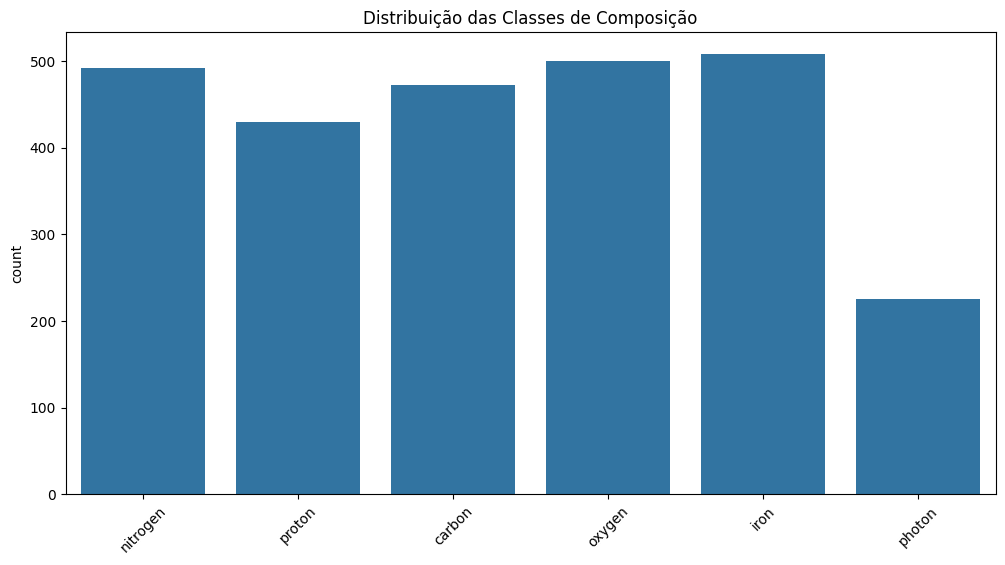


Distribuição antes do balanceamento:
(array(['carbon', 'iron', 'nitrogen', 'oxygen', 'photon', 'proton'],
      dtype=object), array([473, 508, 492, 500, 225, 430]))

Distribuição após balanceamento:
Classes: [0 1 2 3], Contagens: [1465 1465 1465 1465]


In [17]:
from imblearn.over_sampling import SMOTE

remove = ['energy', 'composition', 'simulation_id']

X = df_neural.select(pl.exclude(remove)).to_numpy()
y = df_neural.select('composition').to_numpy().reshape(-1)

y_combined = y.copy()
classes_to_group = ['carbon', 'nitrogen', 'oxygen']
new_class_name = 'CNO'
for i, comp in enumerate(y_combined):
    if comp in classes_to_group:
        y_combined[i] = new_class_name

le = LabelEncoder()
y_encoded = le.fit_transform(y_combined)
num_classes = len(le.classes_)

plt.figure(figsize=(12, 6))
sns.countplot(x=y)
plt.title('Distribuição das Classes de Composição')
plt.xticks(rotation=45)
plt.show()

print("\nDistribuição antes do balanceamento:")
print(f"{np.unique(y, return_counts=True)}")

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X, y_encoded)

print("\nDistribuição após balanceamento:")
unique, counts = np.unique(y_res, return_counts=True)
print(f"Classes: {unique}, Contagens: {counts}")

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, stratify=y_res, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [19]:
class CompositionDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = CompositionDataset(X_train_tensor, y_train_tensor)
test_dataset = CompositionDataset(X_test_tensor, y_test_tensor)

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [20]:
class CompositionClassifier(nn.Module):
    def __init__(self, input_size, num_classes, dropout_prob=0.5):
        super(CompositionClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.BatchNorm1d(512),
            nn.GELU(),
            nn.Dropout(dropout_prob),
            
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.GELU(),
            nn.Dropout(dropout_prob),
            
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.GELU(),
            nn.Dropout(dropout_prob * 0.7),
            
            nn.Linear(128, num_classes)
        )
    
    def forward(self, x):
        return self.model(x)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CompositionClassifier(input_size=X_train.shape[1], num_classes=num_classes).to(device)

In [21]:
class_counts = np.bincount(y_res)
total_samples = sum(class_counts)
class_weights = total_samples / (len(class_counts) * class_counts)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='max', factor=0.5, patience=5, verbose=True
)


C:\Users\Lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [22]:
def train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, epochs=100):
    train_losses = []
    test_losses = []
    train_accs = []
    test_accs = []
    best_acc = 0.0
    
    for epoch in range(epochs):
        # Treino
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        
        train_loss = running_loss / len(train_loader)
        train_acc = correct_train / total_train
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        
        # Validação
        model.eval()
        test_loss = 0.0
        correct_test = 0
        total_test = 0
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()
                
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        test_loss /= len(test_loader)
        test_acc = correct_test / total_test
        test_losses.append(test_loss)
        test_accs.append(test_acc)
        
        # Atualizar scheduler
        scheduler.step(test_acc)
        
        # Salvar melhor modelo
        if test_acc > best_acc:
            best_acc = test_acc
            torch.save(model.state_dict(), 'best_composition_model_auger.pth')
            best_preds = all_preds.copy()
            best_labels = all_labels.copy()
        
        print(f'Epoch {epoch+1}/{epochs} | '
              f'Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | '
              f'Test Loss: {test_loss:.4f}, Acc: {test_acc:.4f}')
    
    return {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'train_accs': train_accs,
        'test_accs': test_accs,
        'best_preds': best_preds,
        'best_labels': best_labels
    }

In [23]:
results = train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, epochs=100)

Epoch 1/100 | Train Loss: 1.3150, Acc: 0.3575 | Test Loss: 1.1974, Acc: 0.4198
Epoch 2/100 | Train Loss: 1.2125, Acc: 0.4168 | Test Loss: 1.1548, Acc: 0.4343
Epoch 3/100 | Train Loss: 1.1776, Acc: 0.4379 | Test Loss: 1.1546, Acc: 0.4326
Epoch 4/100 | Train Loss: 1.1594, Acc: 0.4462 | Test Loss: 1.1357, Acc: 0.4488
Epoch 5/100 | Train Loss: 1.1429, Acc: 0.4529 | Test Loss: 1.1258, Acc: 0.4642
Epoch 6/100 | Train Loss: 1.1239, Acc: 0.4682 | Test Loss: 1.1144, Acc: 0.4684
Epoch 7/100 | Train Loss: 1.1093, Acc: 0.4744 | Test Loss: 1.0981, Acc: 0.4676
Epoch 8/100 | Train Loss: 1.1012, Acc: 0.4785 | Test Loss: 1.0998, Acc: 0.4753
Epoch 9/100 | Train Loss: 1.0961, Acc: 0.4838 | Test Loss: 1.0885, Acc: 0.4735
Epoch 10/100 | Train Loss: 1.0807, Acc: 0.4953 | Test Loss: 1.0765, Acc: 0.4787
Epoch 11/100 | Train Loss: 1.0677, Acc: 0.5028 | Test Loss: 1.0640, Acc: 0.4932
Epoch 12/100 | Train Loss: 1.0576, Acc: 0.5132 | Test Loss: 1.0588, Acc: 0.4983
Epoch 13/100 | Train Loss: 1.0504, Acc: 0.5100 | 

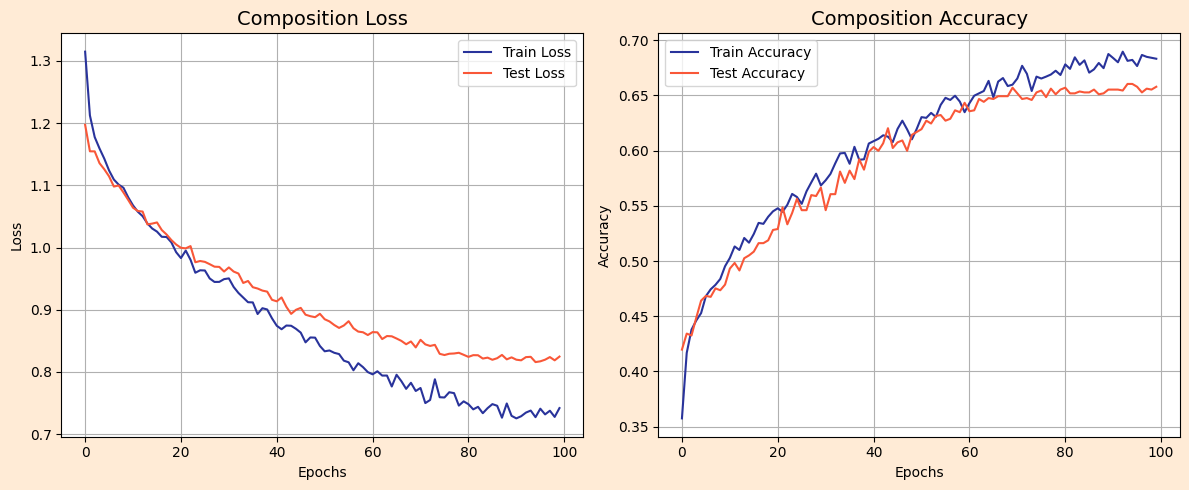

In [24]:
facecolor_fig = '#FFEBD6'  
facecolor_ax = 'white'     
color_train = '#29339B'    
color_test = '#F95738'     

plt.figure(figsize=(12, 5), facecolor=facecolor_fig)

plt.subplot(1, 2, 1)
plt.plot(results['train_losses'], label='Train Loss', color=color_train)
plt.plot(results['test_losses'], label='Test Loss', color=color_test)
plt.title('Composition Loss', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.gca().set_facecolor(facecolor_ax)

plt.subplot(1, 2, 2)
plt.plot(results['train_accs'], label='Train Accuracy', color=color_train)
plt.plot(results['test_accs'], label='Test Accuracy', color=color_test)
plt.title('Composition Accuracy', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.gca().set_facecolor(facecolor_ax)

# Ajusta layout e salva
plt.tight_layout()

plt.savefig('comp_accuracy2_auger.pdf', 
            bbox_inches='tight', 
            dpi=600,
            facecolor=facecolor_fig)

plt.show()

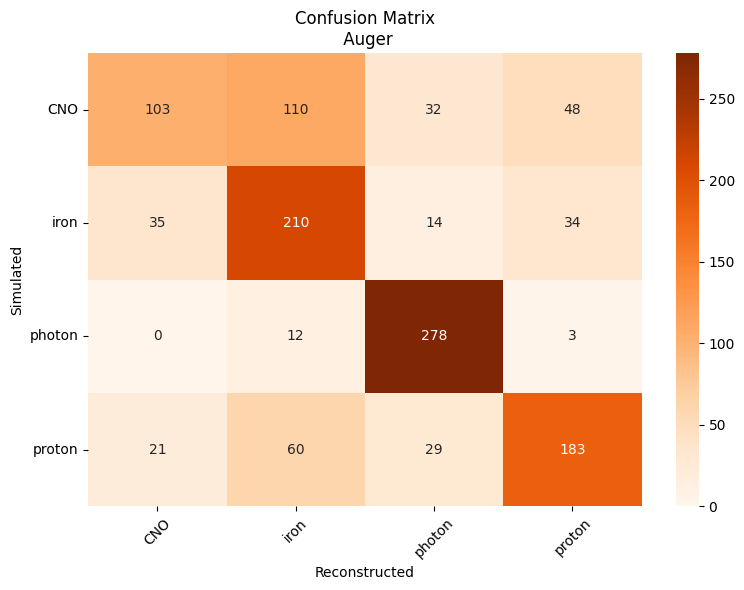


Relatório de Classificação:
              precision    recall  f1-score   support

         CNO       0.65      0.35      0.46       293
        iron       0.54      0.72      0.61       293
      photon       0.79      0.95      0.86       293
      proton       0.68      0.62      0.65       293

    accuracy                           0.66      1172
   macro avg       0.66      0.66      0.65      1172
weighted avg       0.66      0.66      0.65      1172



In [25]:
# Matriz de Confusão
cm = confusion_matrix(results['best_labels'], results['best_preds'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.title('Confusion Matrix\n Auger')
plt.xlabel('Reconstructed')
plt.ylabel('Simulated')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('matrix2_auger.pdf', bbox_inches='tight', dpi=600)
plt.show()

print("\nRelatório de Classificação:")
print(classification_report(
    results['best_labels'], 
    results['best_preds'], 
    target_names=le.classes_
))

C:\Users\Lucas\AppData\Local\Temp\ipykernel_9796\2287995106.py:67: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_composition_model_aug

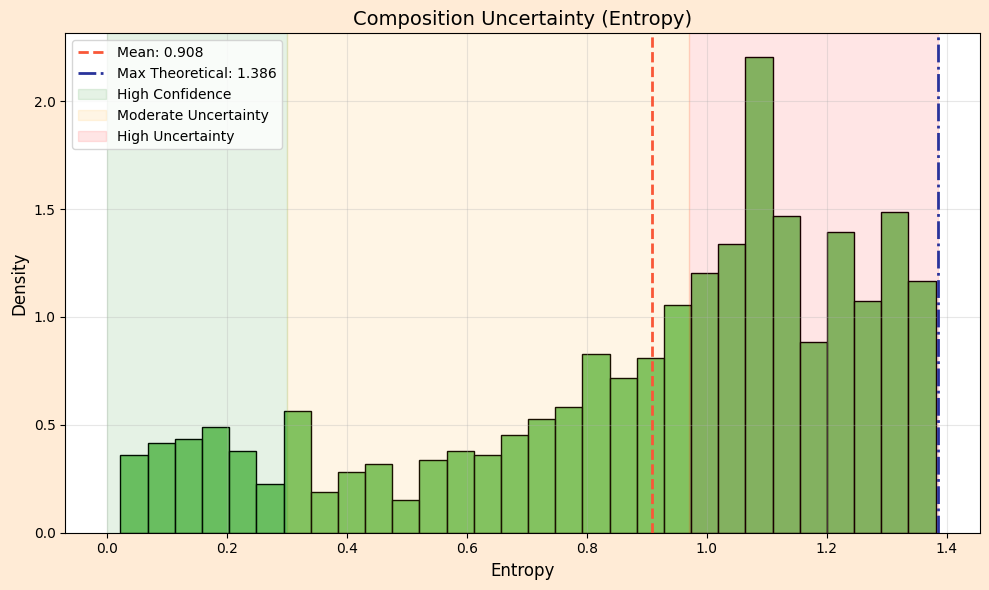

In [27]:
def set_dropout_train(model):
    """Set all dropout layers to training mode and store original states."""
    dropout_states = []
    for m in model.modules():
        if isinstance(m, nn.Dropout):
            dropout_states.append(m.training)
            m.train()
    return dropout_states

def restore_dropout(model, dropout_states):
    """Restore dropout layers to their original states."""
    idx = 0
    for m in model.modules():
        if isinstance(m, nn.Dropout):
            m.train(dropout_states[idx])
            idx += 1

# Função para predições com MC Dropout
def mc_dropout_predict_composition(model, loader, device, num_samples=100):
    """Perform MC Dropout sampling for uncertainty estimation on composition."""
    model.eval()
    dropout_states = set_dropout_train(model)
    
    # Container para probabilidades e entropia
    all_probs = []
    entropy_list = []
    true_labels = []
    
    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # MC sampling para o batch atual
            batch_probs = []
            for _ in range(num_samples):
                outputs = model(inputs)
                probs = torch.softmax(outputs, dim=-1)
                batch_probs.append(probs.cpu().numpy())
            
            # Converter para array numpy
            batch_probs = np.array(batch_probs)  # [num_samples, batch_size, num_classes]
            
            # Calcular probabilidade média sobre as amostras
            mean_probs = np.mean(batch_probs, axis=0)
            
            # Calcular entropia
            entropy = -np.sum(mean_probs * np.log(mean_probs + 1e-9), axis=1)
            
            all_probs.append(mean_probs)
            entropy_list.append(entropy)
            true_labels.append(labels.cpu().numpy())
    
    # Concatenar resultados
    all_probs = np.concatenate(all_probs, axis=0)
    entropy_list = np.concatenate(entropy_list, axis=0)
    true_labels = np.concatenate(true_labels, axis=0)
    
    restore_dropout(model, dropout_states)
    return {
        'mean_probs': all_probs,
        'entropy': entropy_list,
        'true_labels': true_labels
    }

# Carregar o melhor modelo
model.load_state_dict(torch.load('best_composition_model_auger.pth'))
model.to(device)

# Obter predições com incerteza usando MC Dropout
mc_results_comp = mc_dropout_predict_composition(
    model, 
    test_loader, 
    device, 
    num_samples=100
)

# Calcular número de classes e entropia máxima teórica
num_classes = mc_results_comp['mean_probs'].shape[1]
max_entropy = np.log(num_classes)

# Criar figura com fundo bege
plt.figure(figsize=(10, 6), facecolor='#FFEBD6')
ax = plt.gca()
ax.set_facecolor('white')  # Fundo do gráfico branco

# Histograma e KDE
sns.histplot(mc_results_comp['entropy'], bins=30, kde=False, stat='density',
             color='#54B847', alpha=0.8)

# Linhas de referência
plt.axvline(mc_results_comp['entropy'].mean(), color='#F95738', linestyle='--', linewidth=2,
            label=f'Mean: {mc_results_comp["entropy"].mean():.3f}')
plt.axvline(max_entropy, color='#29339B', linestyle='-.', linewidth=2,
            label=f'Max Theoretical: {max_entropy:.3f}')

# Regiões de incerteza
plt.axvspan(0, 0.3, alpha=0.1, color='green', label='High Confidence')
plt.axvspan(0.3, max_entropy*0.7, alpha=0.1, color='orange', label='Moderate Uncertainty')
plt.axvspan(max_entropy*0.7, max_entropy, alpha=0.1, color='red', label='High Uncertainty')

# Configurações do gráfico
plt.xlabel('Entropy', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Composition Uncertainty (Entropy)', fontsize=14)
plt.legend(fontsize=10, facecolor='white', framealpha=0.8)
plt.grid(True, alpha=0.3)

# Salvar e mostrar
plt.tight_layout()
plt.savefig('composition_entropy_auger.pdf', bbox_inches='tight', dpi=600, facecolor='#FFEBD6')
plt.show()